# Clustering

In this notebook clustering is being applied to the correlation dataframe in order to group countries by similarity. The analysis will be performed for the different dimensions of the indicators: equality, socio-demographic and economic. In the end there is a global analysis  using all the indicators and giving a final conclusion to this notebook.

In first place, set the list of indicators depending of the area they represent.

In [1]:
economic_ind = ['CreditToAgriFishForest', 'AgriShareGDP', 'EmploymentRural', '%EmploymentAgriFishForest', 'TotalAgri', '% Soldiers', '% Healthcare Investment', '% Employment Industry', '% Education Expenditure']
soc_dem_ind = ['Marriage Rate', 'Birth Rate', 'Death Rate', 'Homicides', 'Life Expectancy', 'Maternal Death Risk', 'Literacy Rate', 'Infant Mortality', '% Population Growth', '% Rural Population', 'Suicide Rate']
equality_ind = ['Gender Equality', 'Gender Inequality','% Men Employment', '% Women Employment', 'Women Schooling Years', 'Men Schooling Years', 'Freedom of Expression', '% Undernourishment', 'Civil Liberties', 'Gini']

### Import

Import all the libraries and the correlation dataframe generated in the Notebook-Golden.

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.manifold import TSNE
import seaborn as sns
from matplotlib import gridspec
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.cluster import AffinityPropagation
write_path = os.getcwd() + '/Output'
corr_df = pd.read_csv(write_path + '/Corr_DF_pearson.csv')
corr_df.rename(columns = {'Unnamed: 0' : 'Country'}, inplace = True)
corr_df.set_index(corr_df.columns[0], inplace=True)


                AgriShareGDP  CreditToAgriFishForest  EmploymentRural  \
Country                                                                 
Argentina          -0.503461                0.656928              NaN   
Barbados           -0.893559               -0.826103              NaN   
Azerbaijan         -0.858162                     NaN              NaN   
Comoros                  NaN                     NaN              NaN   
Greenland                NaN                     NaN              NaN   
...                      ...                     ...              ...   
Cayman Islands      0.832945                     NaN              NaN   
Mauritius          -0.968061                     NaN              NaN   
Guyana             -0.809598                     NaN              NaN   
Kenya               0.929396               -0.920021              NaN   
Poland             -0.510488                     NaN              NaN   

                TotalAgri  % Soldiers  Birth Rate 

# Equality indicators

Apply the drop columns method to discard indicators which won't be analyzed and fill NaN values with 0. 

In this codeblock use the main piece of the Notebook, the algorithm of t-SNE (t-Distributed Stochastic Neighbor Embedding) to reduce the dimensionality of all the indicators to only 2 components. 
- N-components: the dimensions to analyze.
- Perplexity: measurement of how well a probability distribution or probability model predicts a sample.
- N-iter: iterations for the optimization
- Learning rate: how fast the algorithm learns. A high value may cause a ball form of the data.
- Init: Initialization of embedding. 'pca' is the new default for newer versions.

The output is a dataframe of all the countries with only 2 columns representing the indicators condensed.

In [3]:
df_normalized = corr_df
df_normalized.drop(df_normalized.columns.difference(equality_ind), 1, inplace=True)
df_normalized = df_normalized.dropna(how='all')
df_normalized = df_normalized.fillna(value = 0)
tsne = TSNE(n_components = 2, perplexity = 5, n_iter = 20000, learning_rate = 100.0, init = 'pca')
tsne_result = tsne.fit_transform(df_normalized)
new_df_tsne = pd.DataFrame(np.hstack((np.array(df_normalized.index).reshape(-1, 1), tsne_result)), columns = ['Country', '1st_component', '2nd_component'])
new_df_tsne.set_index('Country', inplace = True)
print(new_df_tsne)

C:\Users\smanoles\AppData\Local\Temp\ipykernel_5524\1083391630.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_normalized.drop(df_normalized.columns.difference(equality_ind), 1, inplace=True)
c:\Users\smanoles\Documents\GitHub\python-data-driven-decisions\.venv\lib\site-packages\sklearn\manifold\_t_sne.py:991: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


             1st_component 2nd_component
Country                                 
Argentina         0.004769     28.372192
Barbados         24.611437     22.477417
Azerbaijan       -3.800133     30.059706
Burkina Faso    -20.327116     67.829842
Sierra Leone    -20.714712    -38.174812
...                    ...           ...
Maldives        -15.489695     62.650936
Mauritius       -22.215483     69.383591
Guyana          -57.253815      0.871426
Kenya           -26.436104    -36.817009
Poland           30.870569    -24.334475

[122 rows x 2 columns]


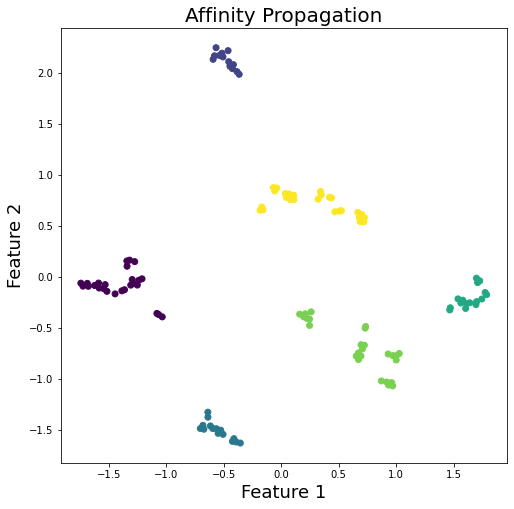

In [4]:
X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_optics.index = new_df_tsne.index
'''Apply OPTICS'''
optics = AffinityPropagation(damping=0.5).fit(X_optics)
labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('Affinity Propagation',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= labels_optics)

In [5]:
fig = px.scatter(X_optics, x= X_optics.columns[0], y=X_optics.columns[1], text= X_optics.index, size_max=100, color=labels_optics)
fig.update_traces(textposition='top center')
fig.update_layout(title_text='Cluster Equality Indicators', title_x=0.5)
fig.show()

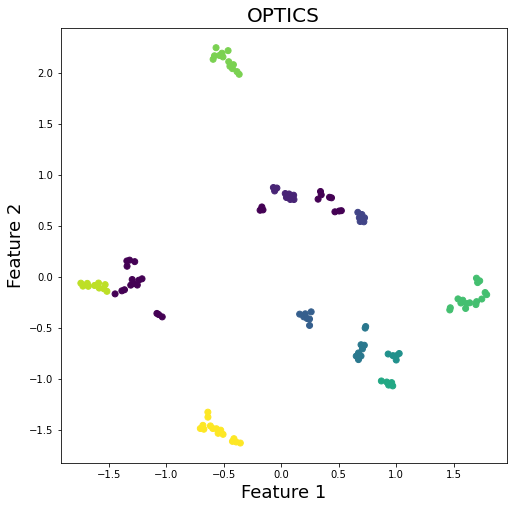

In [6]:

X_optics = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))

'''Apply OPTICS'''
optics = OPTICS(xi=.35, min_cluster_size=3, min_samples=5).fit_predict(X_optics)
#labels_optics = optics.labels_

plt.figure(figsize=(8,8))
plt.title('OPTICS',fontsize= 20)
plt.xlabel('Feature 1',fontsize= 18)
plt.ylabel('Feature 2',fontsize= 18)
fig = plt.scatter(X_optics[0], X_optics[1], c= optics)


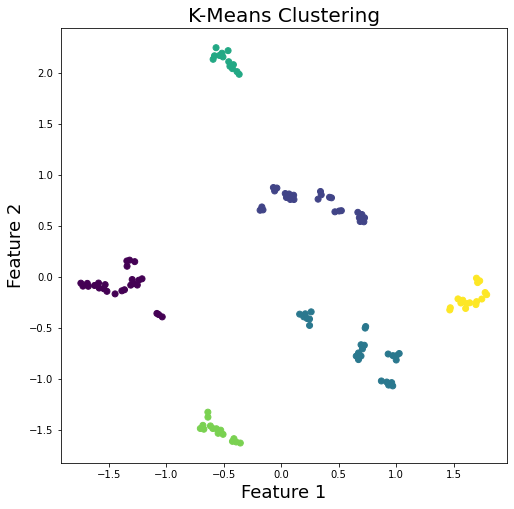

In [7]:

X_kmeans = pd.DataFrame(StandardScaler().fit_transform(new_df_tsne))
X_kmeans.index = new_df_tsne.index
'''Apply K-Means'''
from sklearn.cluster import *
from sklearn.mixture import GaussianMixture


kmean_clusters =   MiniBatchKMeans(n_clusters=6).fit_predict(X_kmeans)

plt.figure(figsize = (8,8))
plt.title('K-Means Clustering',fontsize= 20)
plt.xlabel('Feature 1', fontsize=18)
plt.ylabel('Feature 2', fontsize=18)
f = plt.scatter(X_kmeans[0],X_kmeans[1],c=kmean_clusters)

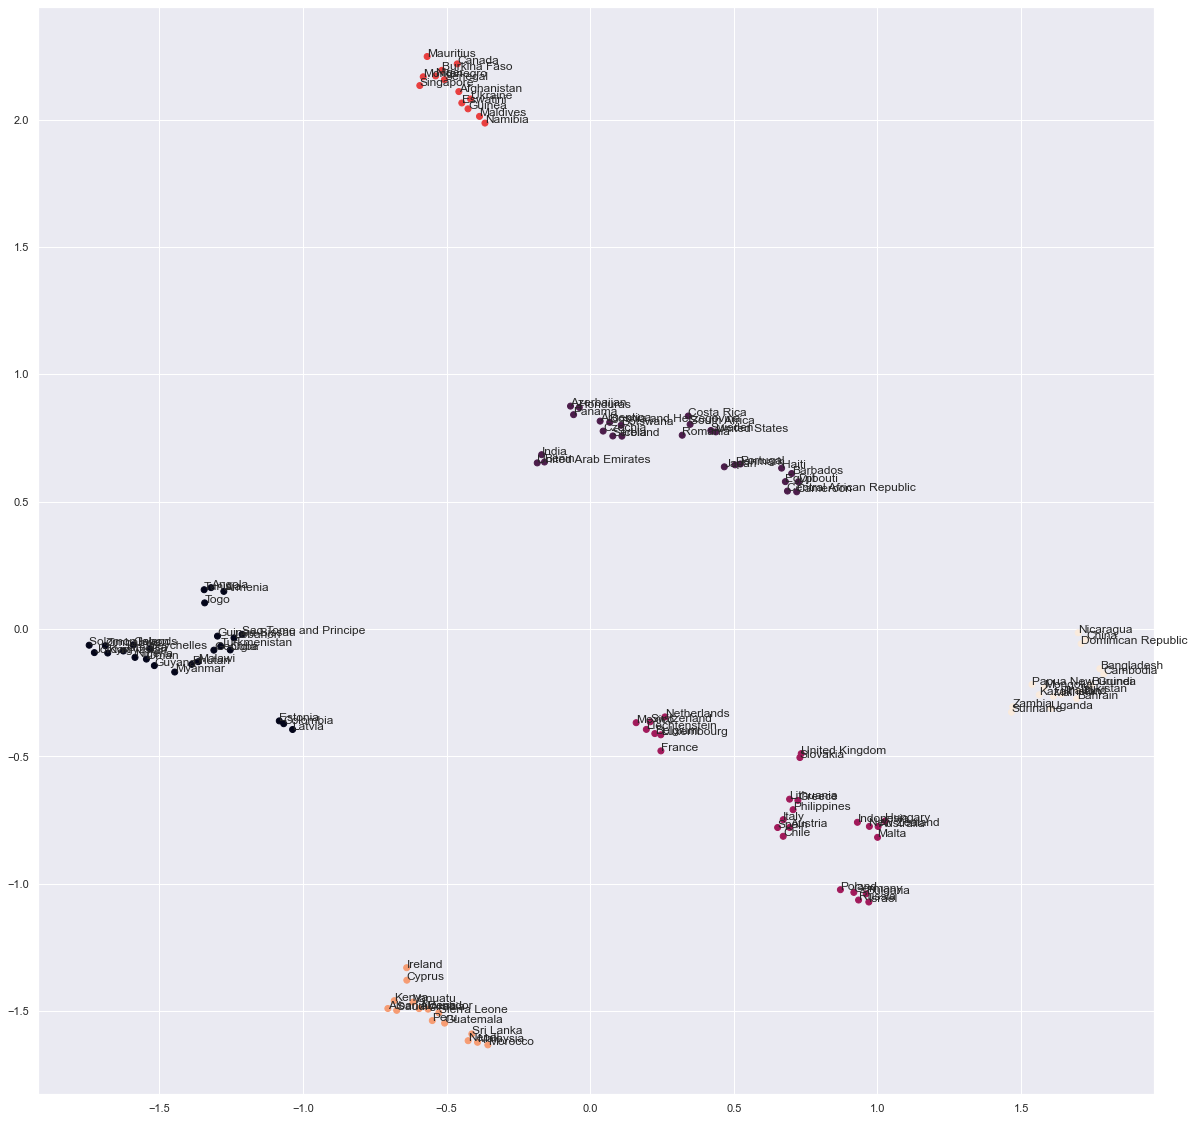

In [8]:
sns.set(rc={'figure.figsize':(20, 20)})


z = X_kmeans[0]
y = X_kmeans[1]
n = new_df_tsne.index.get_level_values(0)
fig, ax = plt.subplots()

ax.scatter(z, y, c=kmean_clusters)



for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

In [9]:
""" new_df_tsne['Cluster'] = kmean_clusters.tolist()
new_df_tsne """

" new_df_tsne['Cluster'] = kmean_clusters.tolist()\nnew_df_tsne "

In [10]:

new_df_tsne.to_csv(write_path + '/Cluster.csv')